In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Importing all the necessary libraries

In [0]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Loading datasets

In [0]:
train1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_1.csv')
train2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_2.csv')
train3 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_3.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test.csv')

## Checking data and determining descriptive statistics

In [8]:
train1.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,Y
0,22203,320000,2,1,2,27,1,2,1
1,1288,470000,1,2,1,41,-2,-2,0
2,11822,20000,1,2,2,25,1,2,0
3,15085,80000,1,3,1,41,0,0,1
4,6192,30000,1,1,2,30,1,-2,1


The description of variables:¶
Y is Client's behavior (target); Y=0 then not default, Y=1 then default. X1 - Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. X2 -Gender (1 = male; 2 = female). X3 - Education (1 = graduate school; 2 = university; 3 = high school; 0,4,5,6 = others). X4 - Marital status (1 = married; 2 = single; 3 = divorce; 0=others). X5 - Age (year). X6 - the repayment status in September, 2005; X7 - the repayment status in August, 2005 (X6,X7) - History of past payment. We tracked the past monthly payment records

In [0]:
train1.rename(columns = {'X1':'credit','X2':'Gender','X3':'Education','X4':'Marital_status','X5':'Age',
                      'X6':'Sep_2005','X7':'Aug_2005'},inplace=True)

In [10]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21600 entries, 0 to 21599
Data columns (total 9 columns):
Ref.No            21600 non-null int64
credit            21600 non-null int64
Gender            21600 non-null int64
Education         21600 non-null int64
Marital_status    21600 non-null int64
Age               21600 non-null int64
Sep_2005          21600 non-null int64
Aug_2005          21600 non-null int64
Y                 21600 non-null int64
dtypes: int64(9)
memory usage: 1.5 MB


In [0]:
cititest = test[['X1','X2','X3','X4','X5','X6','X7']]
cititest.rename(columns = {'X1':'credit','X2':'Gender','X3':'Education','X4':'Marital_status','X5':'Age',
                      'X6':'Sep_2005','X7':'Aug_2005'},inplace=True)

In [12]:
cititest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 7 columns):
credit            2399 non-null int64
Gender            2399 non-null int64
Education         2399 non-null int64
Marital_status    2399 non-null int64
Age               2399 non-null int64
Sep_2005          2399 non-null int64
Aug_2005          2399 non-null int64
dtypes: int64(7)
memory usage: 131.3 KB


## From the information of the dataset we know that all attributes are in numerical datatype and doesn't have any null values

In [14]:
citi = train1.drop(['Ref.No'],1)
citi.columns

Index(['credit', 'Gender', 'Education', 'Marital_status', 'Age', 'Sep_2005',
       'Aug_2005', 'Y'],
      dtype='object')

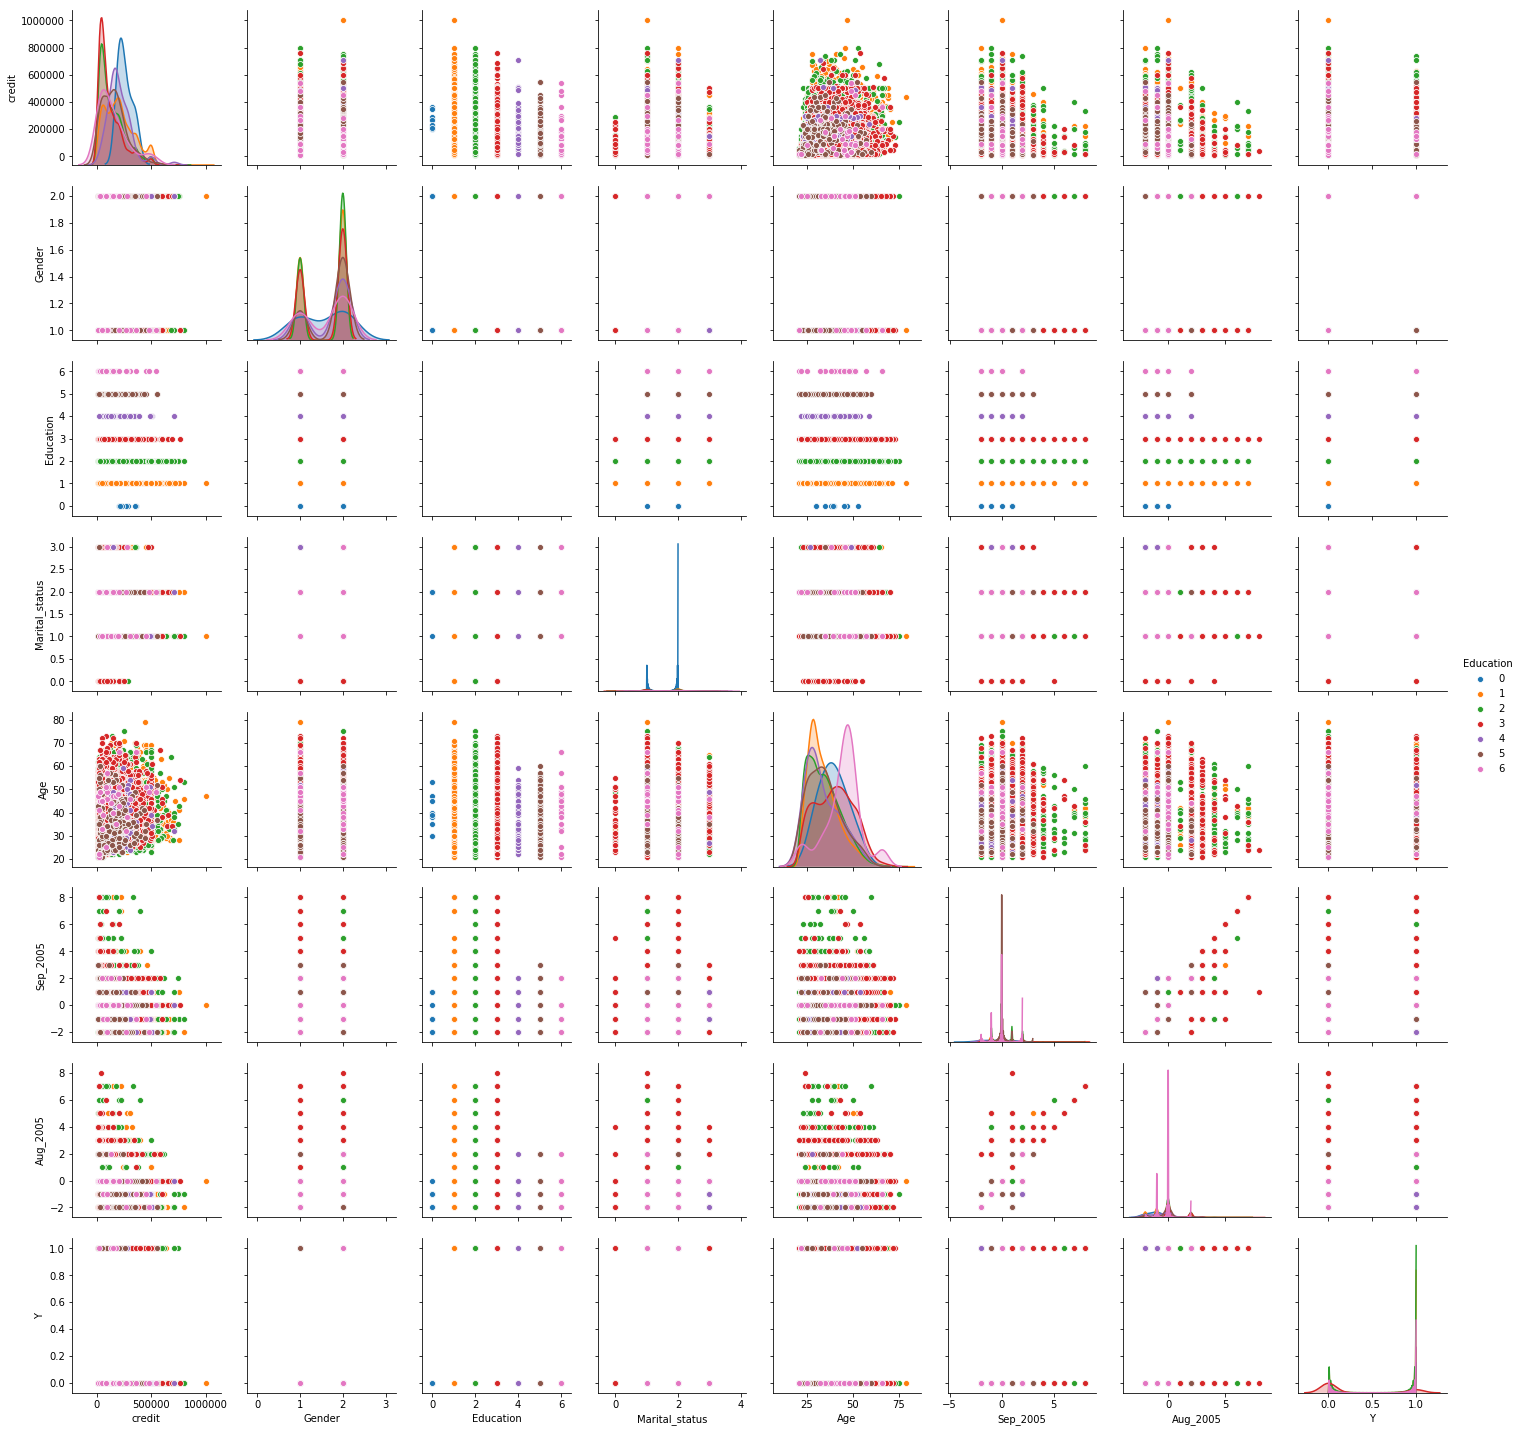

In [16]:
sns.pairplot(citi,diag_kind='kde',hue='Education')

### Checking corelation between the dataset

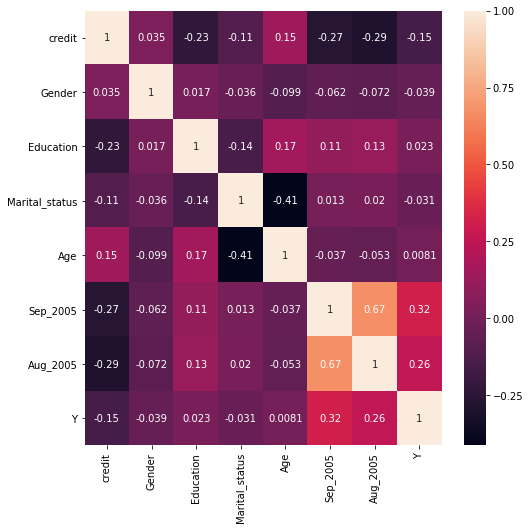

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(citi.corr(),annot=True)

## Visualising countplot with categorical variables - Gender, Education and Marital_Status

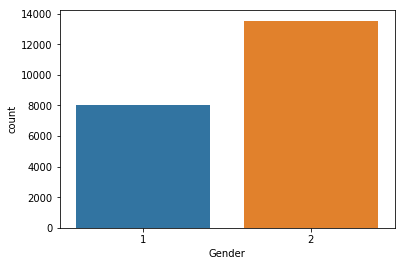

In [18]:
sns.countplot(citi['Gender'],data=citi)
plt.show()

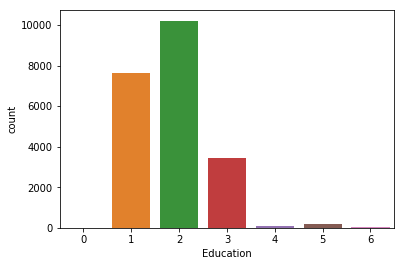

In [19]:
sns.countplot(citi['Education'],data=citi)
plt.show()

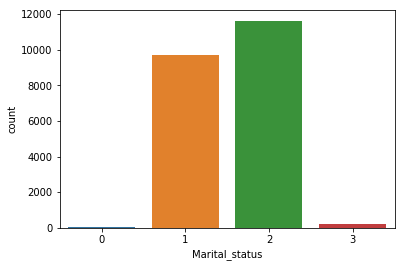

In [20]:
sns.countplot(citi['Marital_status'],data=citi)
plt.show()

### Plotting scatter plot between Age and credit taken. This will detect outliers and will detail what age group has taken how much credit 

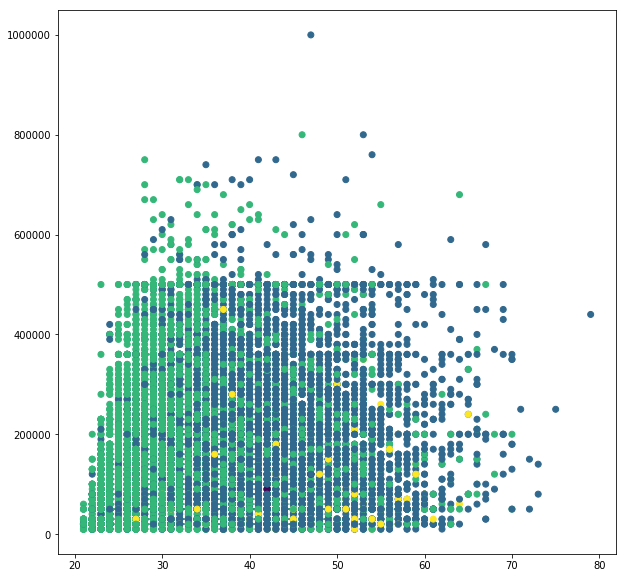

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(citi['Age'],citi['credit'],data=citi,c=citi['Marital_status'])


### Taking inference from 5 point summary

In [22]:
citi.describe()

,credit,Gender,Education,Marital_status,Age,Sep_2005,Aug_2005,Y
count,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,165235.818519,1.626991,1.845926,1.558704,35.382361,-0.002917,-0.124028,0.223796
std,129013.755215,0.483616,0.781139,0.522008,9.266769,1.126164,1.201892,0.416797
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,1.000000


#### From above we infer that there are much outlier so we can do outlier treatment for a better prediction model and both data are in different dataset.
#### To check outliers from boxplot and distribution plot

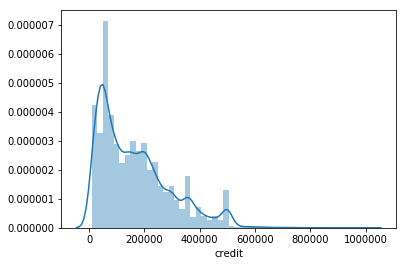

In [24]:
sns.distplot(citi['credit'])

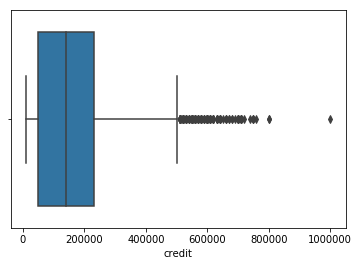

In [25]:
sns.boxplot(citi['credit'])

#### Visualizing boxplot on credit and categorical variables

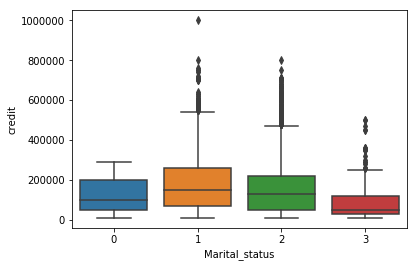

In [26]:
sns.boxplot(citi['Marital_status'],citi['credit'])

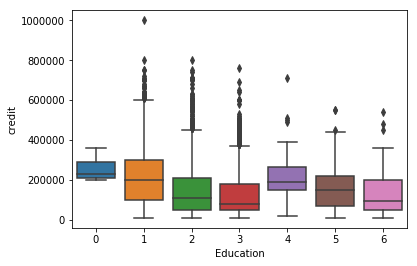

In [27]:
sns.boxplot(citi['Education'],citi['credit'])

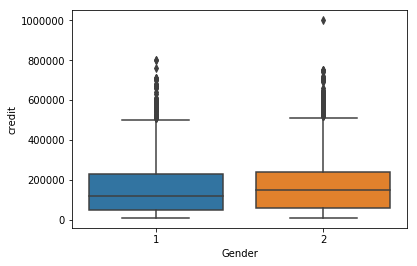

In [28]:
sns.boxplot(citi['Gender'],citi['credit'])

### Treating outlier and creating a new data set 

In [31]:
IQR = (citi.credit.quantile(.75) - citi.credit.quantile(.25))
lower = (citi.credit.quantile(.25) - (1.5*IQR))
print('lower limit is: ',lower)

upper = (citi.credit.quantile(.75) + (1.5*IQR))
print('upper limit is: ',upper)

lower limit is:  -220000.0
upper limit is:  500000.0


In [34]:
citibank = citi[citi['credit']<upper]
citibank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20943 entries, 0 to 21599
Data columns (total 8 columns):
credit            20943 non-null int64
Gender            20943 non-null int64
Education         20943 non-null int64
Marital_status    20943 non-null int64
Age               20943 non-null int64
Sep_2005          20943 non-null int64
Aug_2005          20943 non-null int64
Y                 20943 non-null int64
dtypes: int64(8)
memory usage: 1.4 MB


In [35]:
citibank_out = citi[citi['credit']>=upper]
citibank_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 67 to 21580
Data columns (total 8 columns):
credit            657 non-null int64
Gender            657 non-null int64
Education         657 non-null int64
Marital_status    657 non-null int64
Age               657 non-null int64
Sep_2005          657 non-null int64
Aug_2005          657 non-null int64
Y                 657 non-null int64
dtypes: int64(8)
memory usage: 46.2 KB


#### We have 657 people that have taken much credit than population mean, we can create different models for both as we cannot leave 657 customers on the basis of general model

### Using dummification on categorical values

In [0]:
gender = pd.get_dummies(citibank['Gender'],prefix='Gender')
citibank = pd.concat([citibank,gender],axis=1)
education = pd.get_dummies(citibank['Education'],prefix='Education')
citibank = pd.concat([citibank,education],axis=1)
marital = pd.get_dummies(citibank['Marital_status'],prefix='marital')
citibank = pd.concat([citibank,marital],axis=1)

In [0]:
citibank.drop(['Gender','Education','Marital_status'],1,inplace=True)

In [38]:
citibank.shape

(20943, 18)

In [0]:
gender = pd.get_dummies(citibank_out['Gender'],prefix='Gender')
citibank_out = pd.concat([citibank_out,gender],axis=1)
education = pd.get_dummies(citibank_out['Education'],prefix='Education')
citibank_out = pd.concat([citibank_out,education],axis=1)
marital = pd.get_dummies(citibank_out['Marital_status'],prefix='marital')
citibank_out = pd.concat([citibank_out,marital],axis=1)

In [0]:
citibank_out.drop(['Gender','Education','Marital_status'],1,inplace=True)

In [41]:
citibank_out.shape

(657, 16)

In [42]:
citibank.columns

Index(['credit', 'Age', 'Sep_2005', 'Aug_2005', 'Y', 'Gender_1', 'Gender_2',
       'Education_0', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Education_6', 'marital_0', 'marital_1',
       'marital_2', 'marital_3'],
      dtype='object')

In [43]:
citibank_out.columns

Index(['credit', 'Age', 'Sep_2005', 'Aug_2005', 'Y', 'Gender_1', 'Gender_2',
       'Education_1', 'Education_2', 'Education_3', 'Education_4',
       'Education_5', 'Education_6', 'marital_1', 'marital_2', 'marital_3'],
      dtype='object')

### We observe that those customers taking high credit amount have defined education and marital status. While education and marital status can be categorized as others in set where there are no outliers

In [0]:
gender = pd.get_dummies(cititest['Gender'],prefix='Gender')
cititest = pd.concat([cititest,gender],axis=1)
education = pd.get_dummies(cititest['Education'],prefix='Education')
cititest = pd.concat([cititest,education],axis=1)
marital = pd.get_dummies(cititest['Marital_status'],prefix='marital')
cititest = pd.concat([cititest,marital],axis=1)

In [0]:
cititest.drop(['Gender','Education','Marital_status'],1,inplace=True)

In [46]:
cititest.shape

(2399, 17)

In [47]:
cititest.columns

Index(['credit', 'Age', 'Sep_2005', 'Aug_2005', 'Gender_1', 'Gender_2',
       'Education_0', 'Education_1', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Education_6', 'marital_0', 'marital_1',
       'marital_2', 'marital_3'],
      dtype='object')

### Splitting the data into train and test then scaling the data

In [0]:
X = citibank.drop(['Y'],1)
y=citibank['Y']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)
sc=StandardScaler()
scaledXtrain=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
scaledXtest=pd.DataFrame(sc.transform(X_test),columns=X_test.columns)


#### Transforming the test data 

In [0]:
y1 = sc.fit_transform(cititest)

### Creating a model and creating predict variable to get the score of the model

In [54]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(scaledXtrain,y_train)
y_pred = dt.predict(y1)
dt.score(scaledXtest,y_test)

0.8161706191309884

### we get a score of 81.617 % using decision tree classifier in train data. We can create a submission file using test data to submit the result in kaggle.

In [0]:
pred_dt = dt.predict(y1)

solution = pd.DataFrame({'Ref.No':np.arange(1,2400), "Y": pred_dt})

solution.to_csv('solutiondt.csv',index=False)

#### Similarly we can use the same model using outlier dataset we created

In [0]:
Xo = citibank_out.drop(['Y'],1)
yo=citibank_out['Y']

In [0]:
Xo_train,Xo_test,yo_train,yo_test=train_test_split(Xo,yo,test_size=0.3,random_state=20)
sc=StandardScaler()
scaledXotrain=pd.DataFrame(sc.fit_transform(Xo_train),columns=Xo_train.columns)
scaledXotest=pd.DataFrame(sc.transform(Xo_test),columns=Xo_test.columns)


In [69]:
cititest1=cititest
cititest1=cititest1.drop(['Education_0','marital_0'],1)
cititest1.columns
cititest1.shape

(2399, 15)

In [0]:
y2 = sc.fit_transform(cititest1)

In [71]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(scaledXotrain,yo_train)
y_pred1 = dt.predict(y2)
dt.score(scaledXotest,yo_test)

0.9090909090909091

In [0]:
pred_dt = dt.predict(y2)

solution = pd.DataFrame({'Ref.No':np.arange(1,2400), "Y": pred_dt})

solution.to_csv('solutiondt1.csv',index=False)

### We observe that while working on outlier dataset the model is much overfitting while working on dataset that is without outlier we have a much better prediction model